In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/MyDrive/Colab Notebooks/sem1_application.ipynb" "/content/drive/MyDrive/Tutorial_Deep_Learning_YT/sem1_application.ipynb"

In [5]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [6]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка',
           'кроссовки', 'сумка', 'ботинки']

In [66]:
model = load_model('/content/drive/MyDrive/Tutorial_Deep_Learning_YT/My_first_saved_model.keras', compile=False)

In [67]:
from tensorflow.keras.metrics import AUC
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', AUC(name='AUC_ROC', curve='ROC'), AUC(name='auc_pr', curve='PR')]
)

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
f = files.upload()

Saving 5dfd61b2f4967f9a27fcd85fa93ff13c8450518c_original.jpeg to 5dfd61b2f4967f9a27fcd85fa93ff13c8450518c_original.jpeg


In [69]:
img_path = '5x9sanyjp008gg4skgwwk448s (1).jpg'
img_path2 = '5dfd61b2f4967f9a27fcd85fa93ff13c8450518c_original.jpeg'

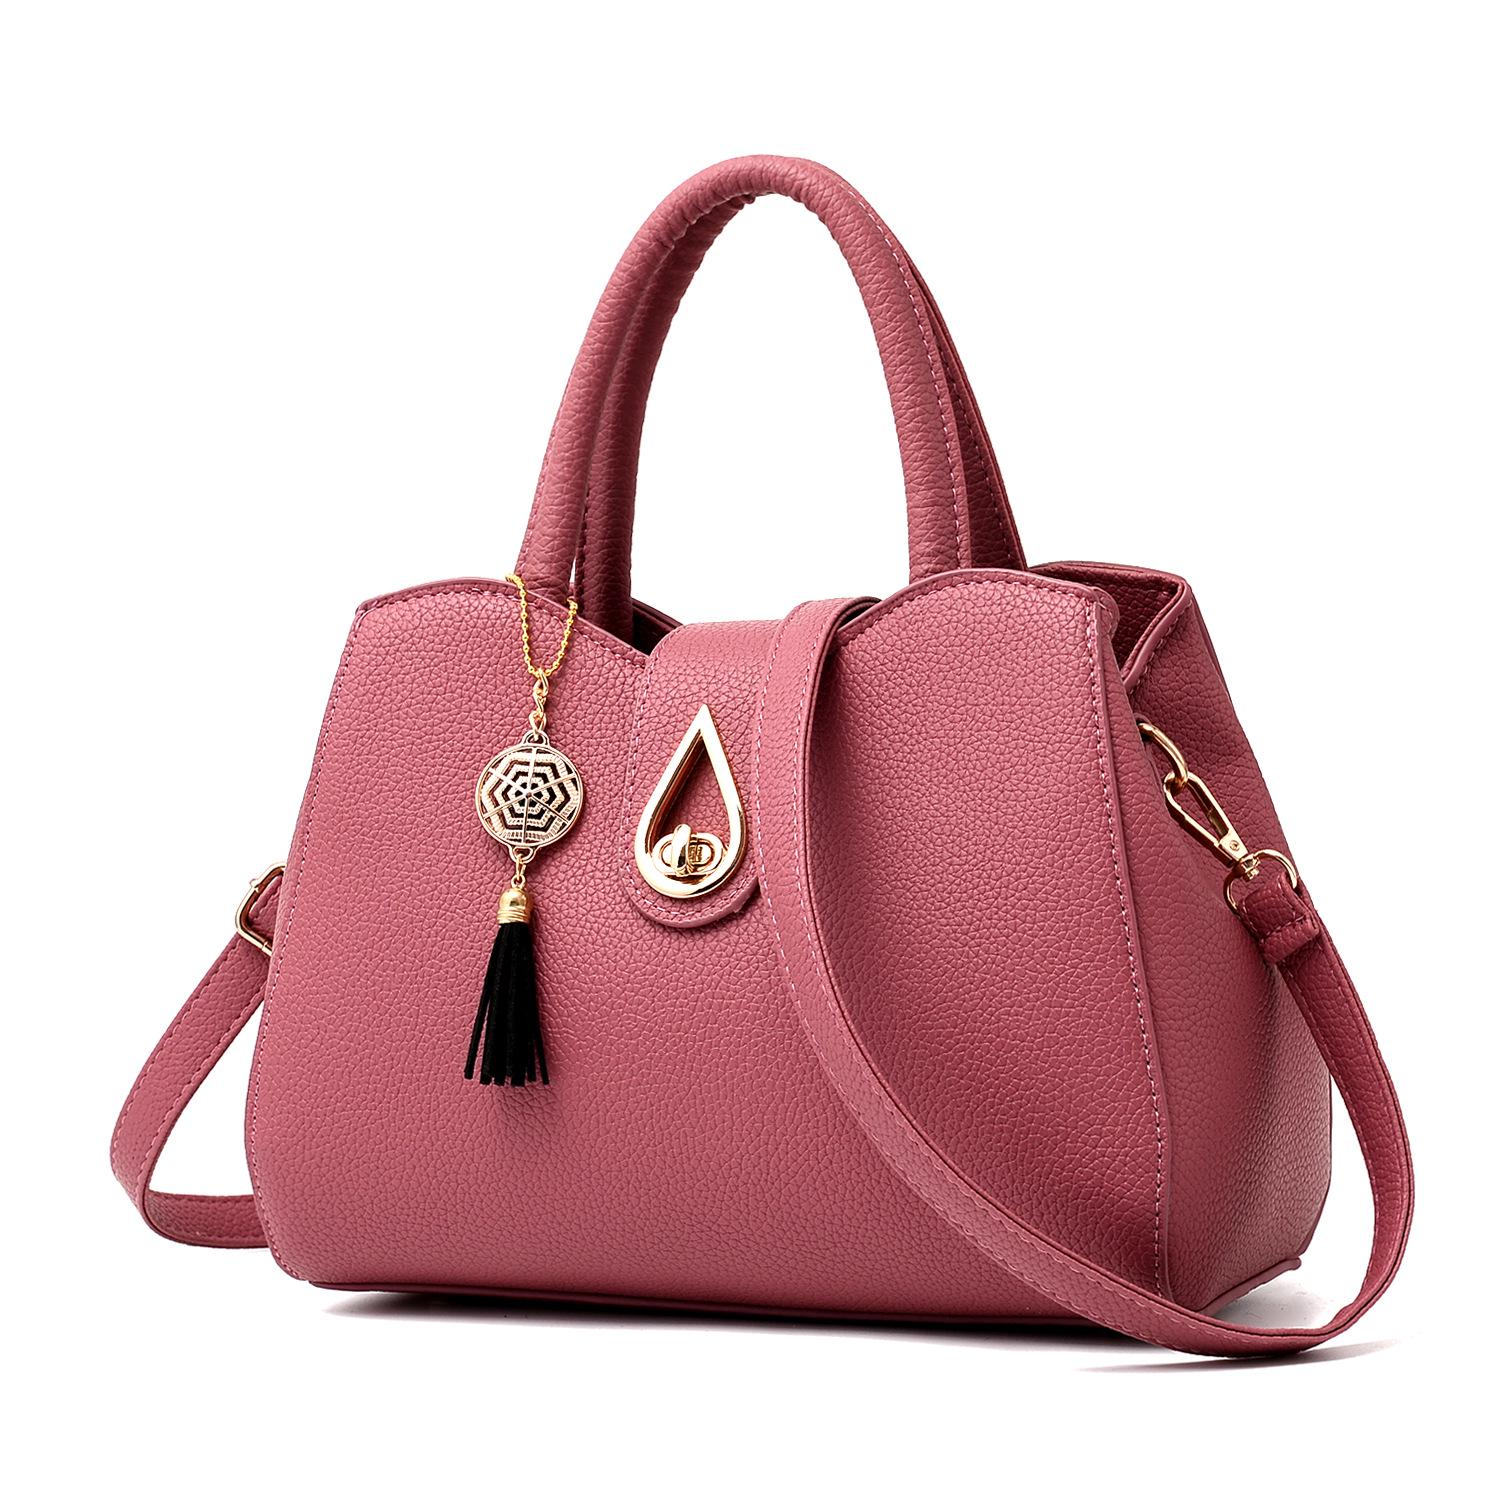

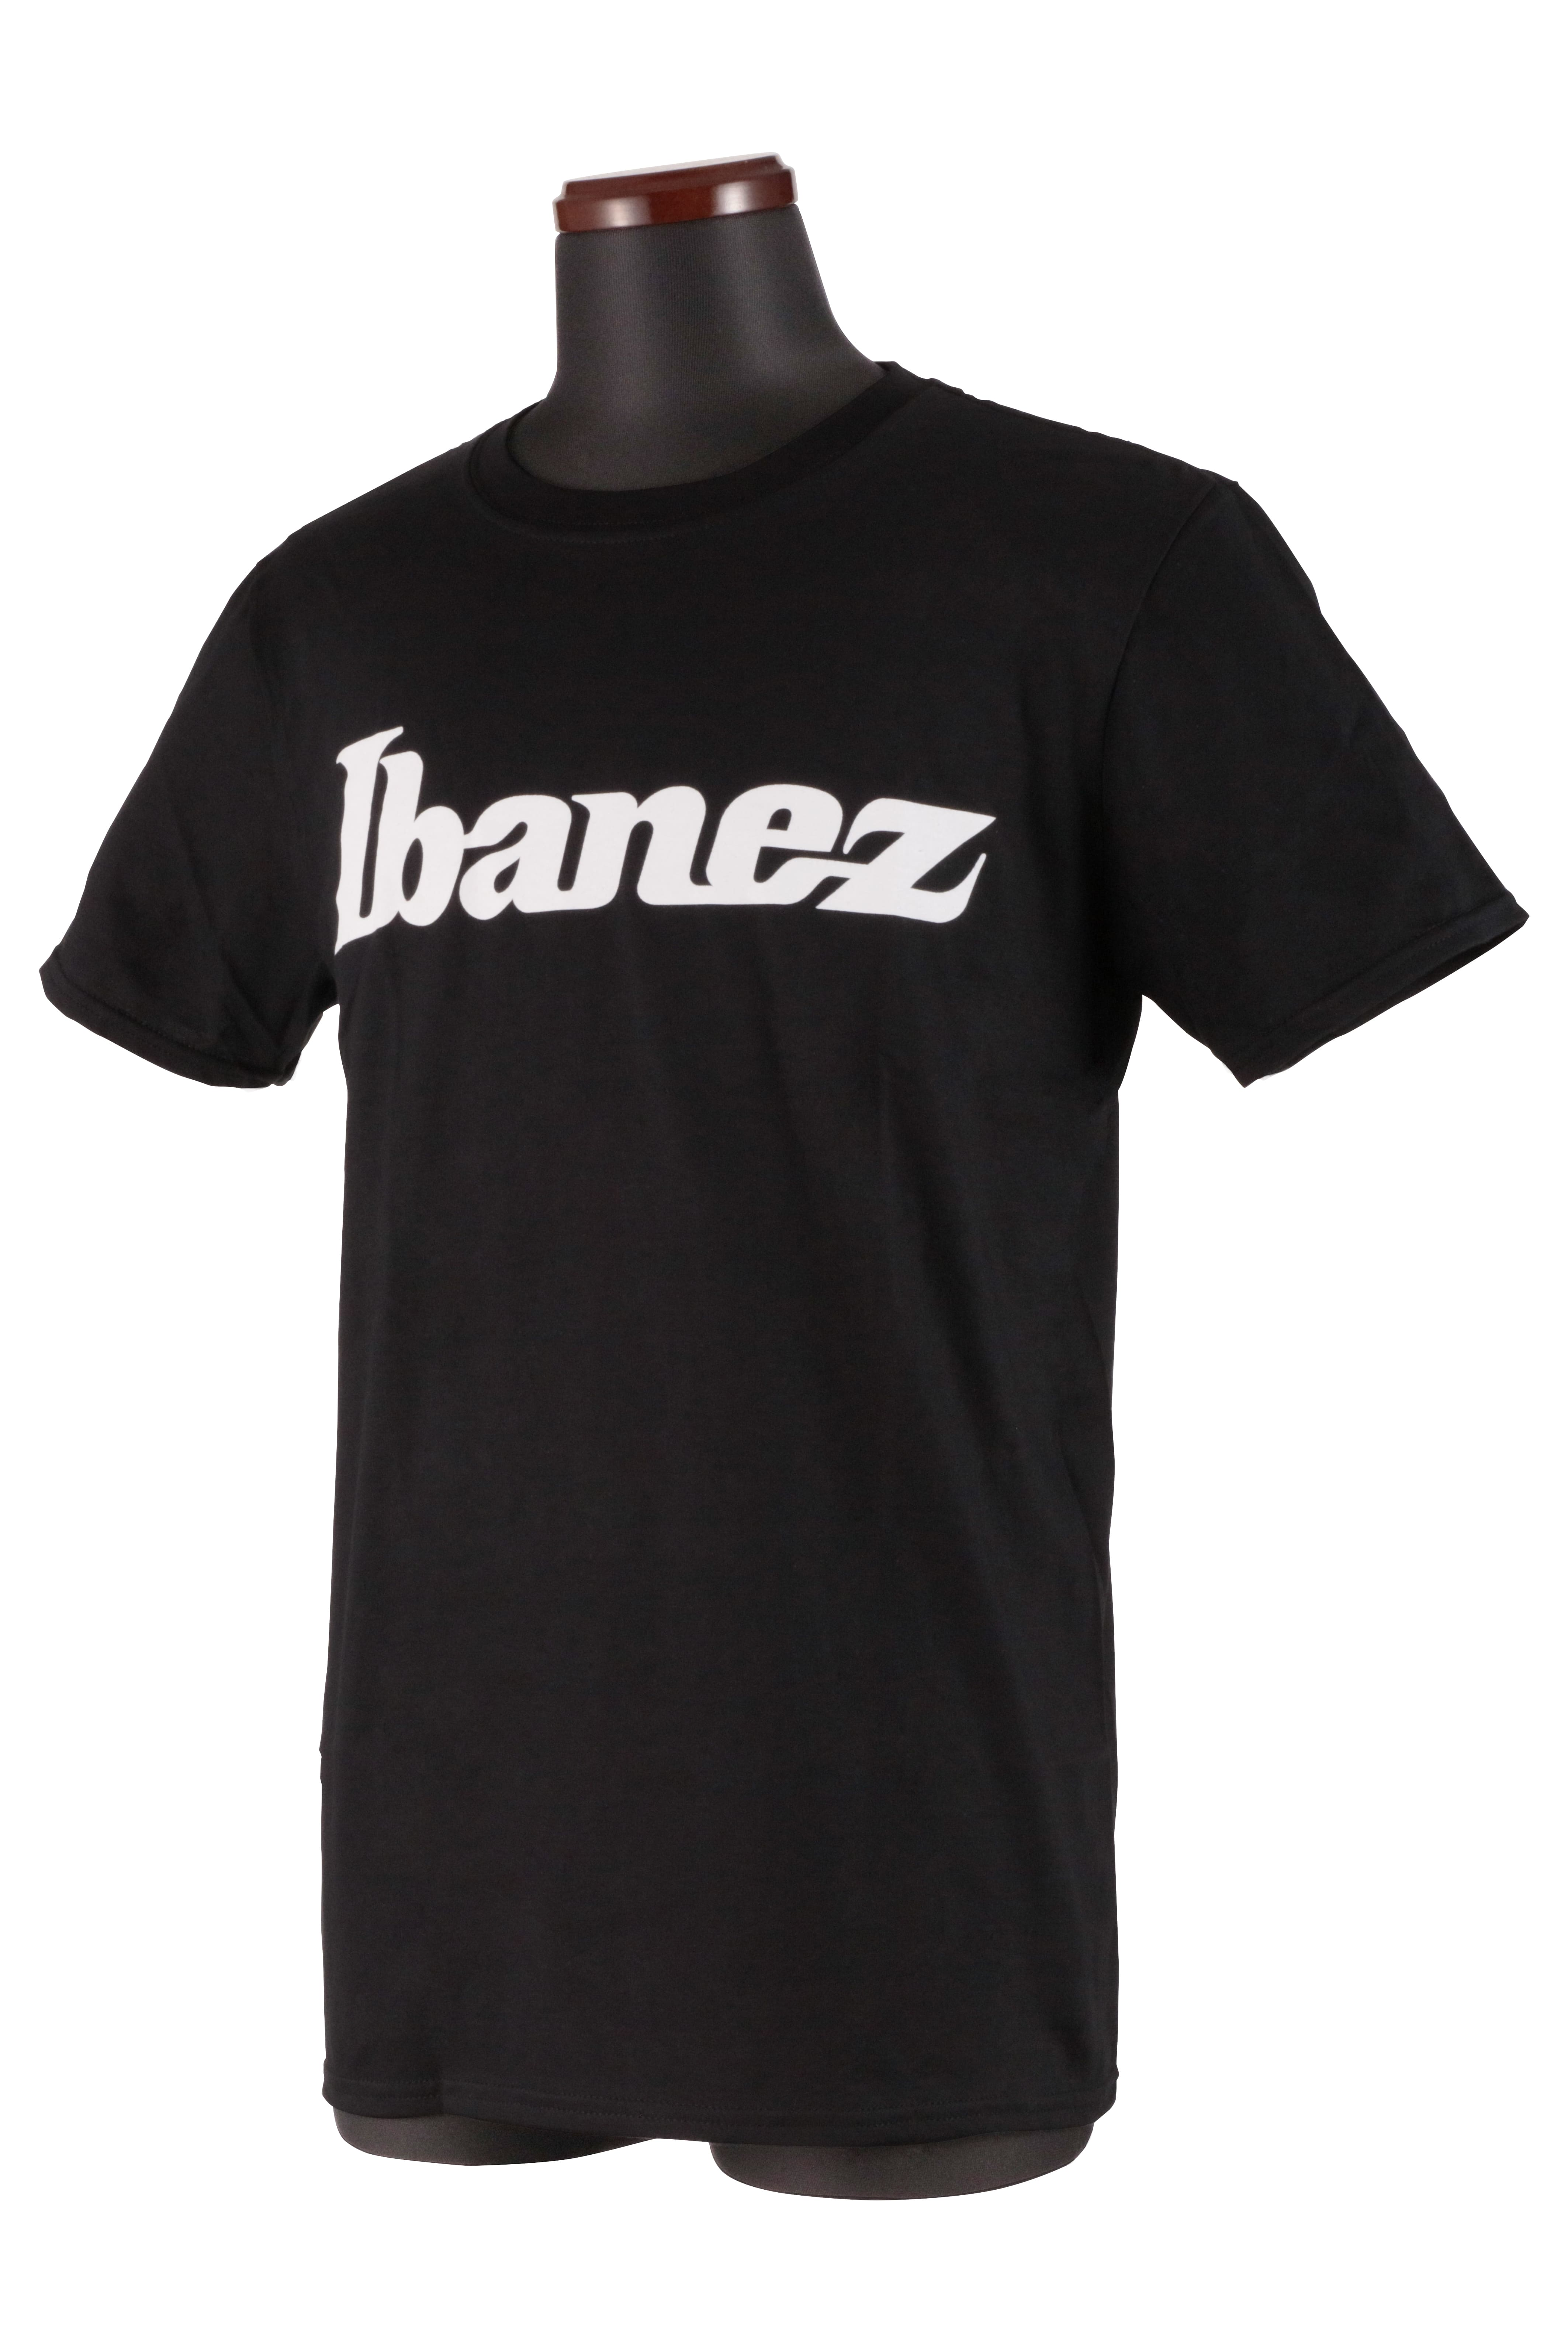

In [89]:
from IPython.display import Image, display

display(Image(img_path2, width=150, height=150))
display(Image(img_path, width=150, height=150))

In [72]:
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img2 = image.load_img(img_path2, target_size=(28, 28), color_mode='grayscale')

In [39]:
x = image.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x
x = x / 255

In [83]:
x2 = image.img_to_array(img2)
x2 = x2.reshape(1, 784)
x2 = 255 - x2
x2 = x2 / 255

In [84]:
prediction2 = model.predict(x2)
prediction2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[8.4821904e-06, 8.4818220e-07, 1.2751110e-04, 8.5133550e-05,
        1.3562435e-02, 1.3276277e-04, 9.5183794e-05, 3.3995388e-05,
        9.8594046e-01, 1.3151300e-05]], dtype=float32)

In [76]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [77]:
prediction

array([[5.7327348e-01, 2.9264922e-05, 5.4139982e-04, 9.3908946e-04,
        1.6163521e-03, 4.5218669e-11, 4.2356572e-01, 1.7960322e-10,
        3.4729266e-05, 6.8634218e-09]], dtype=float32)

In [78]:
prediction1 = np.argmax(prediction)
print(f'Это {classes[prediction1]}')

Это футболка


In [85]:
prediction2 = np.argmax(prediction2)
print(f'Это {classes[prediction2]}')

Это сумка
